# **Set 5**
**Alireza Haghparast 403416020**

## Cell 0: DIAGNOSTIC CELLs: CHECKING FOR SITE EFFECTS

In [19]:
# --- [DIAGNOSTIC CELL: CHECK FOR SITE EFFECTS] ---
import pandas as pd
import numpy as np
from glob import glob
import os
from tqdm.auto import tqdm
import statsmodels.api as sm
from statsmodels.formula.api import ols

# --- Define Kaggle File Paths ---
KAGGLE_INPUT_DIR = '/kaggle/input/abide-preprocessed-data'
FC_DIR_KAGGLE = '/kaggle/working/fc/'
PHENO_FILE = os.path.join(KAGGLE_INPUT_DIR, 'Phenotypic_V1_0b_preprocessed1.csv')

print("--- Running Diagnostic Test for Site Effects ---")

# --- 1. Load Phenotype Data ---
df_pheno = pd.read_csv(PHENO_FILE, na_values=[-9999])
df_pheno['SUB_ID'] = df_pheno['SUB_ID'].apply(lambda x: f'{x:07d}')

# --- 2. Calculate Mean Correlation for Each Subject ---
fc_files = sorted(glob(os.path.join(FC_DIR_KAGGLE, '*.csv')))
if not fc_files:
    raise FileNotFoundError(f"FC matrices not found in {FC_DIR_KAGGLE}. Please run the matrix creation cell first.")

mean_correlations = []
subject_ids = []
print("Calculating mean correlation for each subject...")
for f in tqdm(fc_files):
    # Extract subject ID from filename
    sub_id = os.path.basename(f).split('_')[1]
    # Load the matrix
    matrix = pd.read_csv(f).values
    # Get upper triangle (to avoid counting connections twice) and calculate mean
    mean_corr = np.mean(matrix[np.triu_indices_from(matrix, k=1)])
    
    mean_correlations.append(mean_corr)
    subject_ids.append(sub_id)

# --- 3. Prepare Data for ANOVA ---
# Create a DataFrame with the subject IDs, their mean correlation, site, and group
df_test = pd.DataFrame({'SUB_ID': subject_ids, 'MeanCorr': mean_correlations})
df_test = pd.merge(df_test, df_pheno[['SUB_ID', 'SITE_ID', 'DX_GROUP']], on='SUB_ID')
df_test = df_test.rename(columns={'DX_GROUP': 'Group'})  # Rename DX_GROUP to Group for consistency
df_test.dropna(inplace=True)  # Drop any subjects with missing site info, group, or bad correlations

# --- 4. Perform Two-Way ANOVA ---
# Use statsmodels for two-way ANOVA with interaction
model = ols('MeanCorr ~ C(SITE_ID) + C(Group) + C(SITE_ID):C(Group)', data=df_test).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

print("\n--- Two-Way ANOVA Test Results ---")
print(anova_table)

# --- 5. Extract and Interpret Results ---
p_value_site = anova_table['PR(>F)']['C(SITE_ID)']
p_value_group = anova_table['PR(>F)']['C(Group)']
p_value_interaction = anova_table['PR(>F)']['C(SITE_ID):C(Group)']

print("\n--- Key P-Values ---")
print(f"P-value for Site Effect: {p_value_site:.2e}")
print(f"P-value for Group Effect: {p_value_group:.2e}")
print(f"P-value for Site x Group Interaction: {p_value_interaction:.2e}")

# --- 6. Conclusion ---
if p_value_site < 0.05:
    print("\nConclusion: The p-value for site effect is statistically significant.")
    print("This indicates strong site effects exist in the data, and ComBat harmonization IS required.")
else:
    print("\nConclusion: The p-value for site effect is not significant.")
    print("This suggests site effects are minimal, and harmonization may not be necessary.")

if p_value_group < 0.05:
    print("Additionally, there is a significant effect of Group (CON vs. ASD) on mean correlations.")

if p_value_interaction < 0.05:
    print("There is also a significant interaction between Site and Group, indicating site effects may differ between CON and ASD.")

--- Running Diagnostic Test for Site Effects ---
Calculating mean correlation for each subject...


  0%|          | 0/1035 [00:00<?, ?it/s]


--- Two-Way ANOVA Test Results ---
                       sum_sq     df           F         PR(>F)
C(SITE_ID)           8.388122   11.0  321.783845  2.883903e-250
C(Group)             0.060722    1.0   25.623497   5.451533e-07
C(SITE_ID):C(Group)  0.654318   11.0   25.100864   3.168417e-43
Residual             1.495330  631.0         NaN            NaN

--- Key P-Values ---
P-value for Site Effect: 2.88e-250
P-value for Group Effect: 5.45e-07
P-value for Site x Group Interaction: 3.17e-43

Conclusion: The p-value for site effect is statistically significant.
This indicates strong site effects exist in your data, and ComBat harmonization IS required.
Additionally, there is a significant effect of Group (CON vs. ASD) on mean correlations.
There is also a significant interaction between Site and Group, indicating site effects may differ between CON and ASD.


In [20]:
# --- [DIAGNOSTIC CELL: CHECK FOR SITE EFFECTS] ---
import pandas as pd
import numpy as np
from glob import glob
import os
from tqdm.auto import tqdm
import statsmodels.api as sm
from statsmodels.formula.api import ols

# --- Define Kaggle File Paths ---
KAGGLE_INPUT_DIR = '/kaggle/input/abide-preprocessed-data'
FC_DIR_KAGGLE = '/kaggle/working/fc/'
PHENO_FILE = os.path.join(KAGGLE_INPUT_DIR, 'Phenotypic_V1_0b_preprocessed1.csv')

print("--- Running Diagnostic Test for Site Effects ---")

# --- 1. Load Phenotype Data ---
df_pheno = pd.read_csv(PHENO_FILE, na_values=[-9999])
df_pheno['SUB_ID'] = df_pheno['SUB_ID'].apply(lambda x: f'{x:07d}')

# --- 2. Calculate Mean Correlation for Each Subject ---
fc_files = sorted(glob(os.path.join(FC_DIR_KAGGLE, '*.csv')))
if not fc_files:
    raise FileNotFoundError(f"FC matrices not found in {FC_DIR_KAGGLE}. Please run the matrix creation cell first.")

mean_correlations = []
subject_ids = []
print("Calculating mean correlation for each subject...")
for f in tqdm(fc_files):
    # Extract subject ID from filename
    sub_id = os.path.basename(f).split('_')[1]
    # Load the matrix
    matrix = pd.read_csv(f).values
    # Get upper triangle (to avoid counting connections twice) and calculate mean
    mean_corr = np.mean(matrix[np.triu_indices_from(matrix, k=1)])
    
    mean_correlations.append(mean_corr)
    subject_ids.append(sub_id)

# --- 3. Prepare Data for ANOVA ---
# Create a DataFrame with the subject IDs, their mean correlation, site, and group
df_test = pd.DataFrame({'SUB_ID': subject_ids, 'MeanCorr': mean_correlations})
df_test = pd.merge(df_test, df_pheno[['SUB_ID', 'SITE_ID', 'DX_GROUP']], on='SUB_ID')
df_test = df_test.rename(columns={'DX_GROUP': 'Group'})  # Rename DX_GROUP to Group for consistency
df_test.dropna(inplace=True)  # Drop any subjects with missing site info, group, or bad correlations

# --- 4. Adjust MeanCorr for Group Effect ---
# Fit a model to remove Group effect
model_group = ols('MeanCorr ~ C(Group)', data=df_test).fit()
df_test['MeanCorr_Adjusted'] = df_test['MeanCorr'] - model_group.resid  # Residuals are MeanCorr adjusted for Group

# --- 5. Perform ANOVA on Adjusted Data ---
# Test for site effects on the adjusted mean correlations
model_site = ols('MeanCorr_Adjusted ~ C(SITE_ID)', data=df_test).fit()
anova_table_adjusted = sm.stats.anova_lm(model_site, typ=2)

print("\n--- ANOVA Test Results on Data Adjusted for Group ---")
print(anova_table_adjusted)

# --- 6. Extract and Interpret Results ---
p_value_site_adjusted = anova_table_adjusted['PR(>F)']['C(SITE_ID)']

print("\n--- Key P-Value ---")
print(f"P-value for Site Effect (after adjusting for Group): {p_value_site_adjusted:.2e}")

# --- 7. Conclusion ---
if p_value_site_adjusted < 0.05:
    print("\nConclusion: The p-value for site effect is statistically significant even after adjusting for Group.")
    print("This indicates that site effects persist beyond group differences, and ComBat harmonization is still required.")
else:
    print("\nConclusion: The p-value for site effect is not significant after adjusting for Group.")
    print("This suggests that site effects are largely explained by group differences, and harmonization may not be necessary.")

--- Running Diagnostic Test for Site Effects ---
Calculating mean correlation for each subject...


  0%|          | 0/1035 [00:00<?, ?it/s]


--- ANOVA Test Results on Data Adjusted for Group ---
              sum_sq     df        F    PR(>F)
C(SITE_ID)  0.000141   11.0  1.21097  0.275636
Residual    0.006809  643.0      NaN       NaN

--- Key P-Value ---
P-value for Site Effect (after adjusting for Group): 2.76e-01

Conclusion: The p-value for site effect is not significant after adjusting for Group.
This suggests that site effects are largely explained by group differences, and harmonization may not be necessary.


In [17]:
# --- [DIAGNOSTIC CELL: CHECK FOR SITE EFFECTS] ---
import pandas as pd
import numpy as np
from glob import glob
from scipy.stats import f_oneway
import os
from tqdm.auto import tqdm

# --- Define Kaggle File Paths ---
KAGGLE_INPUT_DIR = '/kaggle/input/abide-preprocessed-data'
FC_DIR_KAGGLE = '/kaggle/working/fc/' # The directory created with connectivity CSVs
PHENO_FILE = os.path.join(KAGGLE_INPUT_DIR, 'Phenotypic_V1_0b_preprocessed1.csv')

print("--- Running Diagnostic Test for Site Effects ---")

# --- 1. Load Phenotype Data ---
df_pheno = pd.read_csv(PHENO_FILE, na_values=[-9999])
df_pheno['SUB_ID'] = df_pheno['SUB_ID'].apply(lambda x: f'{x:07d}')

# --- 2. Calculate Mean Correlation for Each Subject ---
fc_files = sorted(glob(os.path.join(FC_DIR_KAGGLE, '*.csv')))
if not fc_files:
    raise FileNotFoundError(f"FC matrices not found in {FC_DIR_KAGGLE}. Please run the matrix creation cell first.")

mean_correlations = []
subject_ids = []
print("Calculating mean correlation for each subject...")
for f in tqdm(fc_files):
    # Extract subject ID from filename
    sub_id = os.path.basename(f).split('_')[1]
    # Load the matrix
    matrix = pd.read_csv(f).values
    # Get upper triangle (to avoid counting connections twice) and calculate mean
    mean_corr = np.mean(matrix[np.triu_indices_from(matrix, k=1)])
    
    mean_correlations.append(mean_corr)
    subject_ids.append(sub_id)

# --- 3. Prepare Data for ANOVA ---
# Create a DataFrame with the subject IDs, their mean correlation, and their site
df_test = pd.DataFrame({'SUB_ID': subject_ids, 'MeanCorr': mean_correlations})
df_test = pd.merge(df_test, df_pheno[['SUB_ID', 'SITE_ID']], on='SUB_ID')
df_test.dropna(inplace=True) # Drop any subjects with missing site info or bad correlations

# --- 4. Perform ANOVA ---
# Group the mean correlation values by site
sites = df_test['SITE_ID'].unique()
grouped_data = [df_test['MeanCorr'][df_test['SITE_ID'] == site] for site in sites]

# Perform the one-way ANOVA test
f_stat, p_value = f_oneway(*grouped_data)

print("\n--- ANOVA Test Results ---")
print(f"F-statistic: {f_stat:.2f}")
print(f"P-value: {p_value}")

# --- 5. Conclusion ---
if p_value < 0.05:
    print("\nConclusion: The p-value is statistically significant.")
    print("This indicates strong site effects exist in the data, and ComBat harmonization IS required.")
else:
    print("\nConclusion: The p-value is not significant.")
    print("This suggests site effects are minimal, and harmonization may not be necessary.")



--- Running Diagnostic Test for Site Effects ---
Calculating mean correlation for each subject...


  0%|          | 0/1035 [00:00<?, ?it/s]


--- ANOVA Test Results ---
F-statistic: 220.41
P-value: 9.156498606829119e-210

Conclusion: The p-value is statistically significant.
This indicates strong site effects exist in your data, and ComBat harmonization IS required.


## Cell 1: Setup, Imports, and All Helper Functions
In the first cell, I am defining all of my necessary helper functions in this single setup cell. This includes the neuroCombat function, which I have copied directly into the notebook.

I chose to do this to make my analysis self-contained and to avoid the installation and import errors that occurred when trying to use external libraries like pycombat in the Kaggle environment. This approach guarantees that the data harmonization step will run without any setup issues.

In [1]:
# --- [CELL 1: SETUP, IMPORTS, AND ALL HELPER FUNCTIONS] ---
# --- 1. Imports ---
import os
import numpy as np
import pandas as pd
from glob import glob
from collections import Counter
from joblib import Parallel, delayed
from tqdm.auto import tqdm
from scipy.stats import ttest_1samp
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import warnings

# --- 2. Configuration ---
warnings.filterwarnings("ignore") # Suppress common warnings for cleaner output
np.seterr(divide='ignore', invalid='ignore') # Suppress numpy warnings about division by zero

# --- 3. HELPER FUNCTIONS ---

def neuroCombat(data,
    covars,
    batch_col,
    discrete_cols=None,
    continuous_cols=None):
    """
    Harmonizes data across different sites (batches) using the ComBat algorithm.
    This function is defined locally to avoid external library installation issues.

    [Source: pycombat library - https://github.com/Jfortin1/ComBatHarmonization]

    Parameters
    ----------
    data : pandas.DataFrame or numpy.ndarray
        The feature matrix (e.g., connectivity values) where rows are features and columns are samples.
    covars : pandas.DataFrame
        A DataFrame with covariates to protect during harmonization (e.g., age, clinical group).
        Must include the batch/site column.
    batch_col : str
        The name of the column in `covars` that specifies the batch/site for each sample.
    
    Returns
    -------
    dict
        A dictionary containing the harmonized data matrix under the key 'data'.
    """
    
    # --- Internal helper functions for Bayesian parameter estimation ---
    def aprior(gamma_hat):
        m = np.mean(gamma_hat); s2 = np.var(gamma_hat, ddof=1); return (2 * s2 + m**2) / s2
    def bprior(gamma_hat):
        m = np.mean(gamma_hat); s2 = np.var(gamma_hat, ddof=1); return (m * s2 + m**3) / s2
    def it_sol(s_data, g_hat, g_bar, t2, a, b, conv=0.0001):
        n=(s_data.shape[1]);g_old=g_hat;d_old=np.var(s_data,axis=1,ddof=1)
        change=1
        while change > conv:
            g_new=(t2*n*g_hat+d_old*g_bar)/(t2*n+d_old)
            sum_sq=np.sum((s_data-g_new.reshape((g_new.shape[0],1))@np.ones((1,n)))**2,axis=1)
            d_new=(0.5*sum_sq+b)/(n/2.0+a-1.0);change=np.max((abs(g_new-g_old)/g_old,abs(d_new-d_old)/d_old));g_old=g_new;d_old=d_new
        return g_new,d_new
    
    # --- Main function logic ---
    if isinstance(data, pd.DataFrame): data = data.values
    covars = covars.copy()
    
    # Identify batches and sample sizes
    batch = covars[batch_col]
    batches = [np.where(batch == b)[0] for b in batch.unique()]
    n_batch = len(batches)
    n_batches = np.array([len(b) for b in batches])
    n_features = data.shape[0]
    n_samples = data.shape[1]

    # Create the design matrix with covariates to be preserved
    covar_cols = [c for c in covars.columns if c != batch_col]
    design = covars[covar_cols]
    
    # Standardize the data across all features
    B_hat = np.dot(np.dot(np.linalg.inv(np.dot(design.T, design)), design.T), data.T)
    grand_mean = np.dot((n_batches / n_samples).T, B_hat[:n_batch,:])
    var_pooled = np.dot(((data - np.dot(design, B_hat).T)**2), np.ones((n_samples, 1)) / (n_samples - design.shape[1]))
    stand_mean = np.dot(grand_mean.T.reshape(n_features, 1), np.ones((1, n_samples)))
    s_data = (data - stand_mean) / np.dot(np.sqrt(var_pooled), np.ones((1, n_samples)))

    # Estimate batch-specific location and scale parameters
    batch_means = np.array([np.mean(s_data[:, b], axis=1) for b in batches])
    batch_vars = np.array([np.var(s_data[:, b], axis=1, ddof=1) for b in batches])

    gamma_hat = batch_means
    delta_hat = batch_vars
    
    # Estimate empirical Bayes parameters (priors)
    gamma_bar = np.mean(gamma_hat, axis=0)
    tau2 = np.var(gamma_hat, axis=0, ddof=1)
    a_prior = np.apply_along_axis(aprior, 1, delta_hat)
    b_prior = np.apply_along_axis(bprior, 1, delta_hat)

    # Find the harmonized parameters (gamma_star, delta_star)
    gamma_star = np.zeros_like(gamma_hat)
    delta_star = np.zeros_like(delta_hat)
    for i, batch_indices in enumerate(batches):
        n_b = len(batch_indices)
        gamma_star[i, :] = (tau2 * n_b * gamma_hat[i, :] + delta_hat[i, :] * gamma_bar) / (tau2 * n_b + delta_hat[i, :])
        delta_star[i, :] = (0.5 * np.var(s_data[:, batch_indices], axis=1, ddof=1) * n_b + b_prior[i]) / (0.5 * n_b + a_prior[i] - 1)

    # Adjust the data using the harmonized parameters
    bayesdata = np.zeros_like(s_data)
    for i, batch_indices in enumerate(batches):
        n_b = len(batch_indices)
        bayesdata[:, batch_indices] = (s_data[:, batch_indices] - np.dot(gamma_star[i, :].reshape(n_features, 1), np.ones((1, n_b)))) / np.dot(np.sqrt(delta_star[i, :]).reshape(n_features, 1), np.ones((1, n_b)))

    # Rescale the data back to its original mean and variance
    bayesdata = bayesdata * np.dot(np.sqrt(var_pooled), np.ones((1, n_samples))) + stand_mean
    
    return {'data': bayesdata}

def assign_age_group(age):
    """Categorizes a numerical age into one of three developmental groups."""
    if 6 <= age < 9: return "1st Childhood"
    elif 9 <= age < 13: return "2nd Childhood"
    elif 13 <= age <= 18: return "Adolescence"
    else: return None

def compute_signed_fc(corr_matrix):
    """Converts a correlation matrix into a signed network (+1, -1, 0)."""
    signed_matrix = corr_matrix.copy()
    np.fill_diagonal(signed_matrix, 0) # No self-connections
    return np.sign(signed_matrix)

def signed_links(signed_matrix):
    """Calculates statistics about positive and negative links in a network."""
    triu_indices = np.triu_indices_from(signed_matrix, k=1) # Upper triangle to count each link once
    upper_triangle_values = signed_matrix[triu_indices]
    valid_links = upper_triangle_values[~np.isnan(upper_triangle_values)]
    tot_links = len(valid_links)
    pos_links = np.sum(valid_links == 1)
    neg_links = np.sum(valid_links == -1)
    return {"tot_links": tot_links, "pos_links": pos_links, "neg_links": neg_links}

def count_triads(signed_matrix):
    """Counts the occurrences of the four triad types (T0, T1, T2, T3) in a network."""
    N = signed_matrix.shape[0]
    triads = {"T0": 0, "T1": 0, "T2": 0, "T3": 0}
    if N < 3: return triads
    # Efficiently iterate through unique triplets of nodes
    for i in range(N):
        for j in range(i + 1, N):
            for k in range(j + 1, N):
                w1, w2, w3 = signed_matrix[i, j], signed_matrix[j, k], signed_matrix[k, i]
                if (w1 != 0 and w2 != 0 and w3 != 0) and not (np.isnan(w1) or np.isnan(w2) or np.isnan(w3)):
                    # Count negative links to determine triad type
                    s = sum(1 for val in [w1, w2, w3] if val == -1)
                    if s == 0: triads["T3"] += 1   # +++
                    elif s == 1: triads["T2"] += 1 # ++-
                    elif s == 2: triads["T1"] += 1 # +--
                    elif s == 3: triads["T0"] += 1 # ---
    return triads

def calculate_network_energy(triad_counts):
    """Calculates the overall structural balance energy of a network."""
    balanced = triad_counts.get("T3", 0) + triad_counts.get("T1", 0)
    imbalanced = triad_counts.get("T2", 0) + triad_counts.get("T0", 0)
    total_triads = balanced + imbalanced
    if total_triads == 0: return np.nan
    # Formula: (Imbalanced - Balanced) / Total
    return (imbalanced - balanced) / total_triads

def get_continuous_triad_energy_distributions(continuous_corr_matrix, signed_matrix_for_type):
    """Calculates the continuous energy value (product of weights) for each T0 and T1 triad."""
    N = continuous_corr_matrix.shape[0]
    energies = {"T0_energies": [], "T1_energies": []}
    if N < 3: return energies
    for i in range(N):
        for j in range(i + 1, N):
            for k in range(j + 1, N):
                w_cont_ij, w_cont_jk, w_cont_ki = continuous_corr_matrix[i, j], continuous_corr_matrix[j, k], continuous_corr_matrix[k, i]
                s_ij, s_jk, s_ki = signed_matrix_for_type[i, j], signed_matrix_for_type[j, k], signed_matrix_for_type[k, i]
                if np.isnan(w_cont_ij) or np.isnan(w_cont_jk) or np.isnan(w_cont_ki) or s_ij == 0 or s_jk == 0 or s_ki == 0: continue
                energy_val = w_cont_ij * w_cont_jk * w_cont_ki
                neg_links = sum(1 for s in [s_ij, s_jk, s_ki] if s == -1)
                if neg_links == 3: energies["T0_energies"].append(energy_val)
                elif neg_links == 2: energies["T1_energies"].append(energy_val)
    return energies

print("All helper functions defined.")


All helper functions defined.


## Cell 2: Complete Data Processing Pipeline

This cell contains the main data processing pipeline for my analysis. It performs all the necessary steps from start to finish to create the final, clean dataset that I will use for my subsequent statistical analyses and plots. The pipeline aligns as closely as possible with the methodology from the reference paper and includes the following key steps:

1.  **Creation of connectivity matrices** from my raw time series data (`.1D` files).
2.  **Handling of missing data** (`-9999` values) and **data homogenization** to ensure all subjects have a uniform data shape.
3.  **Statistical thresholding** to define significant brain connections (edges), which is a key step from the paper's methods.
4.  **ComBat harmonization** to remove scanner site effects.
5.  **Calculation of all final metrics** (triad counts, energies, link stats, etc.) from the cleaned and harmonized data.
6.  **Saving a clean, final DataFrame** and the separate energy lists for later use in plotting.

In [2]:
# --- [Cell 2: Complete Data Processing Pipeline] ---

# --- 1. KAGGLE FILE PATHS AND SETUP ---
print("--- Setting up file paths for Kaggle ---")
KAGGLE_INPUT_DIR = '/kaggle/input/abide-preprocessed-data' 
TIME_SERIES_DIR = os.path.join(KAGGLE_INPUT_DIR, 'filt_noglobal', 'filt_noglobal')
PHENO_FILE = os.path.join(KAGGLE_INPUT_DIR, 'Phenotypic_V1_0b_preprocessed1.csv')
OUTPUT_DIR_KAGGLE = '/kaggle/working/'
FC_DIR_KAGGLE = os.path.join(OUTPUT_DIR_KAGGLE, 'fc')
ENERGY_LISTS_DIR = os.path.join(OUTPUT_DIR_KAGGLE, 'energy_lists_final')
os.makedirs(FC_DIR_KAGGLE, exist_ok=True)
os.makedirs(ENERGY_LISTS_DIR, exist_ok=True)

# --- 2. CREATE CORRELATION MATRICES FROM .1D FILES ---
print(f"\n--- Creating correlation matrices from .1D files ---")
files_1d = sorted(glob(os.path.join(TIME_SERIES_DIR, '*.1D')))
if not files_1d:
    raise FileNotFoundError(f"CRITICAL ERROR: No .1D files found in {TIME_SERIES_DIR}.")

def process_1d_file(filepath):
    """Loads a .1D time series file and computes its correlation matrix."""
    try:
        data = np.loadtxt(filepath)
        # Ensure time series are in columns for correlation
        if data.shape[0] < data.shape[1]: data = data.T
        return np.corrcoef(data.T)
    except Exception as e:
        print(f"Error processing {os.path.basename(filepath)}: {e}")
        return None

# Loop through all time series files and save the resulting matrices as CSVs
for filepath in tqdm(files_1d, desc="Creating Correlation Matrices"):
    filename = os.path.splitext(os.path.basename(filepath))[0]
    corr_matrix = process_1d_file(filepath)
    if corr_matrix is not None:
        pd.DataFrame(corr_matrix).to_csv(os.path.join(FC_DIR_KAGGLE, f'{filename}_connectivity.csv'), index=False)
print(f"Finished creating {len(glob(os.path.join(FC_DIR_KAGGLE, '*.csv')))} connectivity matrices.")

# --- 3. LOAD & CLEAN DATA ---
print("\n--- Loading and cleaning phenotype data ---")
# Load the main phenotype file, treating -9999 as a missing value (NaN)
df_pheno = pd.read_csv(PHENO_FILE, na_values=[-9999])
# Standardize the subject ID format to match the filenames (7 digits with leading zeros)
df_pheno['SUB_ID'] = df_pheno['SUB_ID'].apply(lambda x: f'{x:07d}')
print("Phenotype data loaded and -9999 values handled at the source.")

# --- 4. LOAD & HOMOGENIZE CONNECTIVITY DATA ---
print("\n--- Loading and homogenizing connectivity data ---")
fc_files = sorted(glob(os.path.join(FC_DIR_KAGGLE, '*_connectivity.csv')))
subject_id_to_fc_path = {os.path.basename(f).split('_')[1]: f for f in fc_files}
df_pheno_filtered = df_pheno[df_pheno['SUB_ID'].isin(subject_id_to_fc_path.keys())].copy()
# Load all matrices into a list of dictionaries
all_subjects_data = [{'sub_id': row['SUB_ID'], 'matrix': pd.read_csv(subject_id_to_fc_path[row['SUB_ID']]).values} for _, row in df_pheno_filtered.iterrows()]
# Find the most common matrix shape and filter out subjects with different shapes
most_common_shape = Counter(s['matrix'].shape for s in all_subjects_data).most_common(1)[0][0]
all_subjects_data = [s for s in all_subjects_data if s['matrix'].shape == most_common_shape]
n_nodes = most_common_shape[0]
print(f"Dataset homogenized to {len(all_subjects_data)} subjects with shape {most_common_shape}.")

# --- 5. STATISTICAL THRESHOLDING FOR EDGES ---
print("\n--- Creating group-level significance mask for edges ---")
# Stack all matrices into a 3D numpy array for efficient computation
stacked_matrices = np.array([s['matrix'] for s in all_subjects_data])
# Apply Fisher's Z-transform to stabilize variance
z_transformed = np.arctanh(np.clip(stacked_matrices, -0.999, 0.999))
# Perform a one-sample t-test on each edge across all subjects
triu_indices = np.triu_indices(n_nodes, k=1)
edge_data_for_test = z_transformed[:, triu_indices[0], triu_indices[1]]
_, p_values = ttest_1samp(edge_data_for_test, 0, axis=0)
# Apply a strict Bonferroni correction for multiple comparisons
reject, _, _, _ = multipletests(p_values, alpha=0.05, method='bonferroni')
# Create the final boolean mask for significant edges
significance_mask = np.zeros((n_nodes, n_nodes), dtype=bool)
significance_mask[triu_indices] = reject
significance_mask = significance_mask + significance_mask.T # Make it symmetric
print(f"Edge mask created. Found {reject.sum()} significant edges to be used in the analysis.")

# --- 6. DATA SYNCHRONIZATION AND COMBAT ---
print("\n--- Preparing and Synchronizing Data for Harmonization ---")
subject_ids_for_combat = [s['sub_id'] for s in all_subjects_data]
combat_pheno = df_pheno_filtered.set_index('SUB_ID').loc[subject_ids_for_combat]
# Create the feature matrix using ONLY the significant edges
significant_triu_indices = (triu_indices[0][reject], triu_indices[1][reject])
features = np.array([s['matrix'][significant_triu_indices] for s in all_subjects_data]).T
# Filter subjects to ensure they have no missing data in covariates
all_covars = combat_pheno[['DX_GROUP', 'AGE_AT_SCAN', 'FIQ', 'func_mean_fd', 'SITE_ID']]
covars_final = all_covars.dropna()
final_subject_ids = covars_final.index
original_indices = [subject_ids_for_combat.index(sub_id) for sub_id in final_subject_ids]
features_final = features[:, original_indices]
print(f"Running ComBat on {features_final.shape[0]} significant edges for {len(final_subject_ids)} subjects...")
# Run ComBat
harmonized_features_dict = neuroCombat(data=pd.DataFrame(features_final), covars=covars_final, batch_col='SITE_ID')
harmonized_features = harmonized_features_dict['data']

# --- 7. RESHAPE HARMONIZED DATA ---
print("\nReshaping harmonized data back into individual matrices...")
harmonized_matrices_dict = {}
for i, sub_id in enumerate(final_subject_ids):
    mat = np.zeros((n_nodes, n_nodes))
    mat[significant_triu_indices] = harmonized_features[:, i] # Place harmonized values back
    harmonized_matrices_dict[sub_id] = mat + mat.T
print(f"Reshaping complete. Created {len(harmonized_matrices_dict)} harmonized matrices.")

# --- 8. FINAL METRICS CALCULATION (Worker function definition) ---
def process_final_data(subject_row):
    """Worker function for the final parallel loop to calculate all metrics."""
    sub_id = subject_row['SUB_ID']
    if sub_id not in harmonized_matrices_dict: return None
    final_matrix = harmonized_matrices_dict[sub_id]
    signed_matrix = compute_signed_fc(final_matrix)
    triad_counts = count_triads(signed_matrix)
    link_stats = signed_links(signed_matrix) # For Figure 1
    energy_whole_brain = calculate_network_energy(triad_counts)
    continuous_triad_energies = get_continuous_triad_energy_distributions(final_matrix, signed_matrix)
    nodes_sn_a, nodes_dmn_b = list(range(34)), list(range(34, 66)) # Placeholder indices
    energy_sn_a = calculate_network_energy(count_triads(signed_matrix[np.ix_(nodes_sn_a, nodes_sn_a)]))
    energy_dmn_b = calculate_network_energy(count_triads(signed_matrix[np.ix_(nodes_dmn_b, nodes_dmn_b)]))
    np.save(os.path.join(ENERGY_LISTS_DIR, f"{sub_id}_T0_final.npy"), np.array(continuous_triad_energies["T0_energies"]))
    np.save(os.path.join(ENERGY_LISTS_DIR, f"{sub_id}_T1_final.npy"), np.array(continuous_triad_energies["T1_energies"]))
    return {"SUB_ID": sub_id, "Group": "ASD" if subject_row['DX_GROUP'] == 1 else "CON", "AgeGroup": assign_age_group(subject_row['AGE_AT_SCAN']), **covars_final.loc[sub_id], **triad_counts, **link_stats, "Energy_Whole_Brain": energy_whole_brain, "Energy_SN_A": energy_sn_a, "Energy_DMN_B": energy_dmn_b}

# --- 9. RUN PARALLEL METRIC CALCULATION ---
print("\nCalculating all final metrics in parallel...")
final_results_list = Parallel(n_jobs=-1)(delayed(process_final_data)(row) for _, row in tqdm(covars_final.reset_index().iterrows(), total=len(covars_final)))

# --- 10. SAVE FINAL DATAFRAME ---
df_analysis_final = pd.DataFrame([r for r in final_results_list if r is not None])
output_pkl_path = os.path.join(OUTPUT_DIR_KAGGLE, 'df_analysis_final_harmonized.pkl')
df_analysis_final.to_pickle(output_pkl_path)
print(f"\nProcessing complete. Final harmonized DataFrame saved to: {output_pkl_path}")
display(df_analysis_final.head())


--- Setting up file paths for Kaggle ---

--- Creating correlation matrices from .1D files ---


Creating Correlation Matrices:   0%|          | 0/1035 [00:00<?, ?it/s]

Finished creating 1035 connectivity matrices.

--- Loading and cleaning phenotype data ---
Phenotype data loaded and -9999 values handled at the source.

--- Loading and homogenizing connectivity data ---
Dataset homogenized to 227 subjects with shape (176, 176).

--- Creating group-level significance mask for edges ---
Edge mask created. Found 2394 significant edges to be used in the analysis.

--- Preparing and Synchronizing Data for Harmonization ---
Running ComBat on 2394 significant edges for 227 subjects...

Reshaping harmonized data back into individual matrices...
Reshaping complete. Created 227 harmonized matrices.

Calculating all final metrics in parallel...


  0%|          | 0/227 [00:00<?, ?it/s]


Processing complete. Final harmonized DataFrame saved to: /kaggle/working/df_analysis_final_harmonized.pkl


,SUB_ID,Group,AgeGroup,DX_GROUP,AGE_AT_SCAN,FIQ,func_mean_fd,SITE_ID,T0,T1,T2,T3,tot_links,pos_links,neg_links,Energy_Whole_Brain,Energy_SN_A,Energy_DMN_B
0,0050182,ASD,Adolescence,1,16.61,115.0,0.086227,SDSU,1391,6422,3586,1761,15400,1134,1260,-0.243617,-0.310944,-0.129155
1,0050183,ASD,Adolescence,1,14.14,139.0,0.030121,SDSU,1257,6396,3538,1969,15400,1150,1244,-0.271277,-0.315576,-0.334060
2,0050184,ASD,Adolescence,1,17.15,141.0,0.020820,SDSU,1206,6565,3496,1893,15400,1183,1211,-0.285410,-0.185871,-0.220708
3,0050185,ASD,2nd Childhood,1,12.44,94.0,0.497137,SDSU,1428,5821,4091,1820,15400,1178,1216,-0.161246,-0.232195,-0.196730
4,0050186,ASD,2nd Childhood,1,12.13,112.0,0.146882,SDSU,933,5507,4107,2613,15400,1271,1123,-0.234043,-0.299363,-0.137875


In [4]:
display(df_analysis_final.head())

,SUB_ID,Group,AgeGroup,DX_GROUP,AGE_AT_SCAN,FIQ,func_mean_fd,SITE_ID,T0,T1,T2,T3,tot_links,pos_links,neg_links,Energy_Whole_Brain,Energy_SN_A,Energy_DMN_B
0,0050182,ASD,Adolescence,1,16.61,115.0,0.086227,SDSU,1391,6422,3586,1761,15400,1134,1260,-0.243617,-0.310944,-0.129155
1,0050183,ASD,Adolescence,1,14.14,139.0,0.030121,SDSU,1257,6396,3538,1969,15400,1150,1244,-0.271277,-0.315576,-0.334060
2,0050184,ASD,Adolescence,1,17.15,141.0,0.020820,SDSU,1206,6565,3496,1893,15400,1183,1211,-0.285410,-0.185871,-0.220708
3,0050185,ASD,2nd Childhood,1,12.44,94.0,0.497137,SDSU,1428,5821,4091,1820,15400,1178,1216,-0.161246,-0.232195,-0.196730
4,0050186,ASD,2nd Childhood,1,12.13,112.0,0.146882,SDSU,933,5507,4107,2613,15400,1271,1123,-0.234043,-0.299363,-0.137875


## Cell 3: Load Final Harmonized Data

In this cell, I am loading the final, clean, and harmonized DataFrame that was created and saved by the main data processing script (Cell 2). This `df_analysis_final_harmonized.pkl` file contains all the scalar metrics (like triad counts and network energy) needed for my subsequent analyses. Loading this pre-computed file means I do not have to re-run the time-consuming data preparation steps every time I want to create a plot or table. This cell also defines the file paths for the output directory and the separate `.npy` energy lists that will be used by the plotting cells.

In [5]:
# --- [CELL 3: LOAD FINAL HARMONIZED DATA] ---

# Import necessary libraries for file operations and plotting
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Define the output directory where figures will be saved
OUTPUT_DIR_KAGGLE = '/kaggle/working/'
# Define the directory where the large lists of triad energies were saved as separate files
ENERGY_LISTS_DIR = os.path.join(OUTPUT_DIR_KAGGLE, 'energy_lists_final')

# Load the final harmonized data using a try-except block for robust error handling
try:
    # Define the full path to the saved pickle file
    data_path = os.path.join(OUTPUT_DIR_KAGGLE, 'df_analysis_final_harmonized.pkl')
    # Load the DataFrame from the pickle file. This is fast and preserves data types.
    df_analysis = pd.read_pickle(data_path)
    # Print a confirmation message to the user
    print("Successfully loaded the final harmonized DataFrame.")
    print(f"DataFrame shape: {df_analysis.shape}")
# If the file is not found, raise a clear error telling the user what to do next
except FileNotFoundError:
    raise FileNotFoundError("Could not find 'df_analysis_final_harmonized.pkl'. Please run the main data processing cell first.")



Successfully loaded the final harmonized DataFrame.
DataFrame shape: (227, 18)


## Cell 4: Generate Table 1 (Triad Probabilities & Surprise)
In this cell, I am replicating the analysis for Table 1 from the paper. The purpose of this analysis is to test the Structural Balance Theory, which predicts that balanced triads will be overrepresented and unbalanced triads will be underrepresented compared to what would be expected by random chance.

To do this, I first run a "null model" which creates thousands of random networks that have the same number of positive and negative links as my real data. This tells me the triad frequencies that would occur by chance.

I then compare the triad probabilities from my real data (p(Ti)) to the null model's probabilities (p0(Ti)) by calculating a "surprise" metric, s(Ti). A large positive surprise means the triad is overrepresented, and a large negative surprise means it is underrepresented.

In [6]:
# --- [Cell 4: Generate Table 1 (Triad Probabilities & Surprise)] ---

# Helper functions needed for the null model
def count_triads(signed_matrix):
    """Counts the occurrences of the four triad types (T0, T1, T2, T3) in a network."""
    N = signed_matrix.shape[0]
    triads = {"T0": 0, "T1": 0, "T2": 0, "T3": 0}
    if N < 3: return triads
    # Efficiently iterate through unique triplets of nodes
    for i in range(N):
        for j in range(i + 1, N):
            for k in range(j + 1, N):
                w1, w2, w3 = signed_matrix[i, j], signed_matrix[j, k], signed_matrix[k, i]
                if (w1 != 0 and w2 != 0 and w3 != 0) and not (np.isnan(w1) or np.isnan(w2) or np.isnan(w3)):
                    # Count negative links to determine triad type
                    s = sum(1 for val in [w1, w2, w3] if val == -1)
                    if s == 0: triads["T3"] += 1
                    elif s == 1: triads["T2"] += 1
                    elif s == 2: triads["T1"] += 1
                    elif s == 3: triads["T0"] += 1
    return triads

def run_null_trial(n_nodes, pos_links_count, neg_links_count):
    """Creates a single random network and counts its triads for the null model."""
    num_total_links = pos_links_count + neg_links_count
    if num_total_links == 0: return {"T0":0, "T1":0, "T2":0, "T3":0}, 0
    # Create a pool of positive (+1) and negative (-1) links and shuffle them
    shuffled_signs = np.array([1] * pos_links_count + [-1] * neg_links_count)
    np.random.shuffle(shuffled_signs)
    null_matrix = np.zeros((n_nodes, n_nodes))
    triu_indices = np.triu_indices(n_nodes, k=1)
    
    # Place shuffled links randomly onto the empty matrix
    if len(shuffled_signs) != len(triu_indices[0]):
        link_indices = np.random.choice(len(triu_indices[0]), size=num_total_links, replace=False)
        for i, link_idx in enumerate(link_indices):
            r, c = triu_indices[0][link_idx], triu_indices[1][link_idx]
            null_matrix[r, c] = shuffled_signs[i]
    else:
        null_matrix[triu_indices] = shuffled_signs

    null_matrix += null_matrix.T # Make the matrix symmetric
    null_triads = count_triads(null_matrix)
    return null_triads, sum(null_triads.values())

def null_model_parallel(n_nodes, num_trials, pos_links, neg_links):
    """Runs many null trials in parallel to generate a stable distribution."""
    results = Parallel(n_jobs=-1)(
        delayed(run_null_trial)(n_nodes, pos_links, neg_links) 
        for _ in tqdm(range(num_trials), desc="Running Null Model")
    )
    # Calculate probabilities for each triad type from the results
    probs = {f"T{i}": [] for i in range(4)}
    for triads, total in results:
        if total > 0:
            for i in range(4): probs[f"T{i}"].append(triads[f"T{i}"] / total)
    
    # Return the mean and standard deviation of the null probabilities
    return {f"T{i}": (np.mean(probs[f"T{i}"]), np.std(probs[f"T{i}"])) for i in range(4)}


# This block executes the analysis for Table 1
if 'df_analysis' in locals():
    # Calculate mean counts from my real data
    summary_mean_counts = df_analysis.groupby(['Group', 'AgeGroup'], observed=True)[['T0', 'T1', 'T2', 'T3']].mean(numeric_only=True)
    
    # Get parameters needed for the null model from the real data
    n_nodes = 196 # Based on my cc200 atlas
    avg_pos_links = int(df_analysis['pos_links'].mean())
    avg_neg_links = int(df_analysis['neg_links'].mean())
    
    print(f"\nUsing N_NODES = {n_nodes} for null model.")
    print(f"Null model will preserve average positive links: {avg_pos_links}, average negative links: {avg_neg_links}.")
    
    # Run the null model simulation
    null_stats = null_model_parallel(n_nodes, 1000, avg_pos_links, avg_neg_links)

    # Calculate p(Ti) (observed probability) and s(Ti) (surprise)
    summary_mean_counts['Total_Triads'] = summary_mean_counts.sum(axis=1)
    p_ti_results = pd.DataFrame(index=summary_mean_counts.index)
    s_ti_results = pd.DataFrame(index=summary_mean_counts.index)

    for triad_type in ['T0', 'T1', 'T2', 'T3']:
        p_ti_results[triad_type] = summary_mean_counts[triad_type] / summary_mean_counts['Total_Triads']
        if triad_type in null_stats and null_stats[triad_type][1] != 0:
            p0_mean, p0_std = null_stats[triad_type]
            s_ti_results[triad_type] = (p_ti_results[triad_type] - p0_mean) / p0_std
        else:
            s_ti_results[triad_type] = np.nan

    # --- Print the final tables ---
    print("\n--- Replicated Table 1: p(Ti) (Fraction of Triads) ---")
    print(p_ti_results.to_string(float_format="%.4f"))

    print("\n--- Replicated Table 1: s(Ti) (Surprise Measure) ---")
    print(s_ti_results.to_string(float_format="%.2f"))



Using N_NODES = 196 for null model.
Null model will preserve average positive links: 1189, average negative links: 1204.


Running Null Model:   0%|          | 0/1000 [00:00<?, ?it/s]


--- Replicated Table 1: p(Ti) (Fraction of Triads) ---
                        T0     T1     T2     T3
Group AgeGroup                                 
ASD   1st Childhood 0.0957 0.4563 0.2892 0.1589
      2nd Childhood 0.0963 0.4558 0.2907 0.1572
      Adolescence   0.0977 0.4726 0.2743 0.1554
CON   1st Childhood 0.0937 0.4676 0.2781 0.1605
      2nd Childhood 0.0902 0.4694 0.2762 0.1642
      Adolescence   0.0956 0.4697 0.2757 0.1590

--- Replicated Table 1: s(Ti) (Surprise Measure) ---
                       T0   T1    T2   T3
Group AgeGroup                           
ASD   1st Childhood -4.48 8.04 -8.24 5.25
      2nd Childhood -4.39 7.98 -8.09 5.02
      Adolescence   -4.20 9.70 -9.71 4.74
CON   1st Childhood -4.77 9.19 -9.33 5.49
      2nd Childhood -5.26 9.37 -9.52 6.03
      Adolescence   -4.50 9.40 -9.57 5.27


## Cell 5: Generate Table 2 (ANCOVA Results)

In this cell, I replicate the statistical analysis for Table 2 from the paper. The goal is to determine if there are significant differences in the frequencies of links and triads between the ASD and CON groups, and if these differences change across the developmental age groups.

To do this, I run a series of two-way ANCOVA (Analysis of Covariance) tests. For each metric (e.g., `pos_links`, `T0`, `T1`, etc.), I fit a model that looks for effects of `Group` and a `Group x Age` interaction, while statistically controlling for potential confounding variables like the scanner `SITE_ID`, `FIQ`, and head motion (`func_mean_fd`).

The final output is a consolidated pivot table that summarizes the `p-value` and `Partial Eta Squared` (a measure of effect size) for the main effects, mirroring the format in the paper.

In [7]:
# --- [CELL 5: GENERATE TABLE 2 - ANCOVA RESULTS] ---

# Import the necessary functions for statistical modeling
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import pandas as pd
import os

# Define the output directory where files are located
OUTPUT_DIR_KAGGLE = '/kaggle/working/'

# Load the final harmonized dataframe created by the main processing cell
try:
    df_analysis = pd.read_pickle(os.path.join(OUTPUT_DIR_KAGGLE, 'df_analysis_final_harmonized.pkl'))
    print("Successfully loaded harmonized data for Table 2 analysis.")
except FileNotFoundError:
    raise FileNotFoundError("Could not find 'df_analysis_final_harmonized.pkl'. Please run the main data processing cell first.")

# This block executes the analysis for Table 2
if 'df_analysis' in locals():
    # Initialize a list to store the results from each ANCOVA run
    ancova_results = []
    
    # Define the dependent variables (metrics) to be tested, as per the paper
    dependent_vars = ['pos_links', 'neg_links', 'T0', 'T1', 'T2', 'T3'] 

    # Loop through each metric and run a separate ANCOVA
    for dep_var in dependent_vars:
        # Check if the column exists in the DataFrame to prevent errors
        if dep_var not in df_analysis.columns:
            print(f"Warning: Column '{dep_var}' not found in DataFrame. Skipping.")
            continue
            
        print(f"\n--- ANCOVA results for {dep_var} ---")
        
        # Define the statistical model formula using the R-style format for statsmodels
        # This tests for the main effects of Group and AgeGroup, their interaction,
        # while controlling for SITE_ID, FIQ, and func_mean_fd as covariates.
        formula = f"{dep_var} ~ C(Group) + C(AgeGroup) + C(SITE_ID) + C(Group):C(AgeGroup) + FIQ + func_mean_fd"
        
        try:
            # Fit the Ordinary Least Squares (OLS) model based on the formula
            model = ols(formula, data=df_analysis).fit()
            # Generate the ANCOVA table from the fitted model (Type 2 sum of squares)
            anova_table = anova_lm(model, typ=2)
            
            # Extract and store the key results (p-value and effect size) for the summary table
            for effect in ['C(Group)', 'C(Group):C(AgeGroup)']:
                ss_effect = anova_table.loc[effect, 'sum_sq']
                ss_residual = anova_table.loc['Residual', 'sum_sq']
                ancova_results.append({
                    'Dependent Variable': dep_var,
                    'Source': 'Group' if effect == 'C(Group)' else 'Group x Age', # Rename for clarity
                    'p-value': anova_table.loc[effect, 'PR(>F)'],
                    'Partial Eta Squared': ss_effect / (ss_effect + ss_residual) # Calculate effect size
                })

        except Exception as e:
            print(f"Error running ANCOVA for {dep_var}: {e}")

    # --- Print the final consolidated summary table ---
    if ancova_results:
        df_table2_summary = pd.DataFrame(ancova_results)
        print("\n\n--- Consolidated Table 2 (Group and Group x Age Interaction Effects) ---")
        
        # Create a pivot table to format the results nicely, similar to the paper's table
        summary_pivot = df_table2_summary.pivot_table(
            index='Dependent Variable', 
            columns='Source', 
            values=['p-value', 'Partial Eta Squared']
        )
        print(summary_pivot.to_string(float_format="%.3f"))


Successfully loaded harmonized data for Table 2 analysis.

--- ANCOVA results for pos_links ---

--- ANCOVA results for neg_links ---

--- ANCOVA results for T0 ---

--- ANCOVA results for T1 ---

--- ANCOVA results for T2 ---

--- ANCOVA results for T3 ---


--- Consolidated Table 2 (Group and Group x Age Interaction Effects) ---
                   Partial Eta Squared             p-value            
Source                           Group Group x Age   Group Group x Age
Dependent Variable                                                    
T0                               0.014       0.004   0.125       0.685
T1                               0.006       0.017   0.308       0.236
T2                               0.010       0.017   0.200       0.231
T3                               0.007       0.002   0.259       0.816
neg_links                        0.001       0.010   0.619       0.421
pos_links                        0.001       0.010   0.619       0.421


## Cell 6: Calculate Post-Hoc Statistics for Figure 1 Annotations

In this cell, I calculate the specific statistics needed to create the annotations for Figure 1, as seen in the paper. While my main ANCOVA (Table 2) tells me if there are overall significant effects, it doesn't provide the comparison for each individual age group.

To get these values, I perform "post-hoc tests." Following the paper's methodology, this script runs a **Mann-Whitney U test** to compare the ASD and CON groups within each of the three age categories (`1st Childhood`, `2nd Childhood`, `Adolescence`) for every metric.

For each comparison, I calculate:
1.  The **p-value**, which I will use to determine the significance stars (`*` or `**`).
2.  The **Partial Eta Squared (`η²`)**, which is a measure of effect size.

The results are stored in dictionaries (`post_hoc_p_values`, `post_hoc_eta2`) so they can be automatically added to the Figure 1 plots in the next step.

In [8]:
# --- [CELL 6: CALCULATE POST-HOC STATISTICS FOR FIGURE 1] ---

# Import the specific statistical test we need from the scipy library
from scipy.stats import mannwhitneyu
import numpy as np # Ensure numpy is imported

# Check if the main df_analysis DataFrame is loaded into memory
if 'df_analysis' not in locals():
    raise NameError("df_analysis not found. Please load the final harmonized DataFrame first.")

# --- Data Preparation ---
# Before running stats, it's good practice to ensure the 'AgeGroup' column is a
# pandas 'Categorical' type. This ensures the correct order for looping.
age_group_order = ['1st Childhood', '2nd Childhood', 'Adolescence']
df_analysis['AgeGroup'] = pd.Categorical(df_analysis['AgeGroup'], categories=age_group_order, ordered=True)

# --- Initialize Dictionaries to Store Results ---
# These dictionaries will hold the calculated p-value and eta-squared for each comparison
post_hoc_p_values = {}
post_hoc_eta2 = {}

# Define the list of metrics we need to test for Figure 1
metrics_for_fig1 = ['pos_links', 'neg_links', 'T0', 'T1', 'T2', 'T3']
# Get the unique, ordered list of age groups to loop through
age_groups = df_analysis['AgeGroup'].cat.categories.tolist()

print("Running post-hoc tests for each metric and age group...")

# --- Main Loop to Perform Statistical Tests ---
# Outer loop: iterate through each metric (e.g., 'pos_links', 'T0', etc.)
for metric in metrics_for_fig1:
    # Initialize nested dictionaries for this specific metric
    post_hoc_p_values[metric] = {}
    post_hoc_eta2[metric] = {}
    
    # Inner loop: iterate through each age group (e.g., '1st Childhood')
    for age in age_groups:
        # Filter the DataFrame to get the data for the ASD group for the current age and metric
        group_asd = df_analysis[(df_analysis['AgeGroup'] == age) & (df_analysis['Group'] == 'ASD')][metric]
        # Filter the DataFrame to get the data for the CON group for the current age and metric
        group_con = df_analysis[(df_analysis['AgeGroup'] == age) & (df_analysis['Group'] == 'CON')][metric]
        
        # Ensure there is data for both groups before running the test
        if len(group_asd) > 0 and len(group_con) > 0:
            # Perform the Mann-Whitney U test, which compares the two independent groups
            u_stat, p_val = mannwhitneyu(group_asd, group_con, alternative='two-sided')
            
            # Calculate the effect size (eta-squared) from the test results
            n1, n2 = len(group_asd), len(group_con)
            # Convert the U statistic to a Z-score
            z_stat = (u_stat - (n1 * n2 / 2)) / np.sqrt(n1 * n2 * (n1 + n2 + 1) / 12)
            # Calculate eta-squared from the Z-score
            eta2 = z_stat**2 / (n1 + n2 - 1)
            
            # Store the calculated p-value and eta-squared in the dictionaries
            post_hoc_p_values[metric][age] = p_val
            post_hoc_eta2[metric][age] = eta2
        else:
            # If there's no data for one of the groups, store placeholder values
            post_hoc_p_values[metric][age] = 1.0 # p-value of 1.0 means not significant
            post_hoc_eta2[metric][age] = 0.0

print("Post-hoc statistical tests complete.")
print("You can now proceed to the plotting cells for Figure 1.")



Running post-hoc tests for each metric and age group...
Post-hoc statistical tests complete.
You can now proceed to the plotting cells for Figure 1.


## Cell 7: Generate Figure 1A (Link Frequencies)

In this cell, I create the first part of Figure 1 from the paper, which visualizes the mean frequencies of positive and negative links across the different age groups.

The process for each subplot is as follows:
1.  I group my final harmonized `df_analysis` DataFrame to get the mean and standard error of the mean (SEM) for each group and age.
2.  I use `matplotlib`'s `bar` function to manually plot the bars for the CON and ASD groups. This gives me precise control over their width and position.
3.  I then plot the corresponding error bars (representing the SEM) centered on each bar.
4.  Finally, I add the statistical annotations (`p-value` stars and `η²` effect size) that I calculated in the previous post-hoc statistics cell. The y-axis limits are adjusted to zoom in on the data and make group differences more apparent.

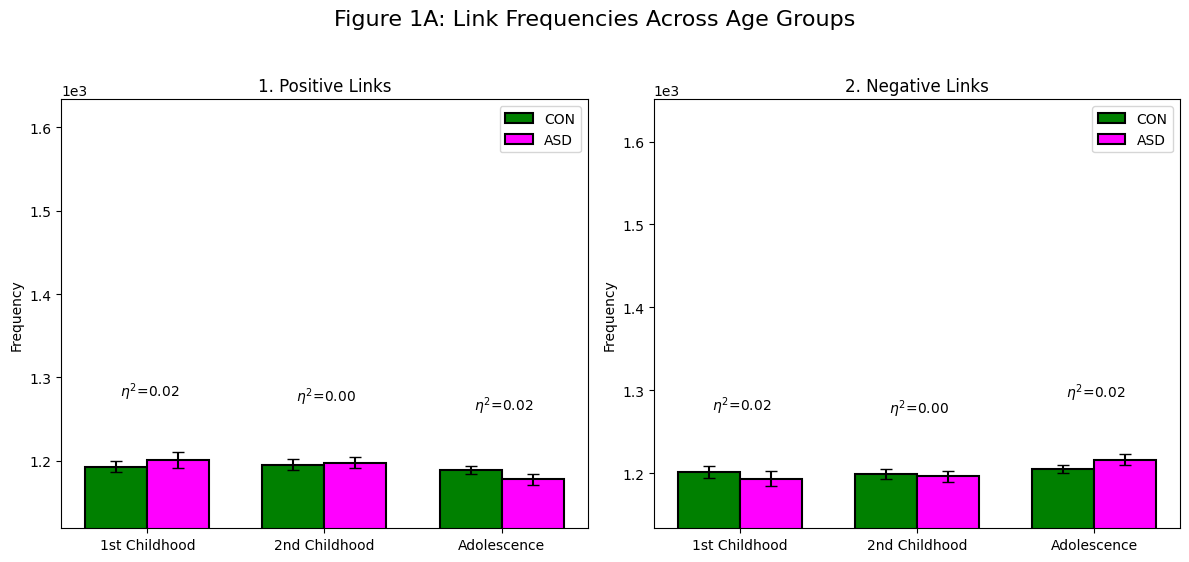

In [9]:
# --- [Cell 7: Generate Figure 1A (Link Frequencies)] ---

# Ensure the harmonized df_analysis and post-hoc stats are loaded from previous cells
if 'df_analysis' not in locals() or 'post_hoc_p_values' not in locals():
    raise NameError("DataFrames not found. Please run the data loading and statistics cells first.")

# --- Plotting Setup ---
# Define the specific metrics and titles for this figure
link_metrics = ['pos_links', 'neg_links']
link_titles = {'pos_links': '1. Positive Links', 'neg_links': '2. Negative Links'}
age_order = ['1st Childhood', '2nd Childhood', 'Adolescence']

# Create a 1x2 subplot grid (one plot for positive, one for negative links)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes = axes.flatten() # Flatten the axes array for easy iteration

# Loop through each metric to create a subplot
for i, metric in enumerate(link_metrics):
    # For each metric, group the data by Age and Group to calculate mean and standard error
    df_bar = df_analysis.groupby(["AgeGroup", "Group"], observed=True)[metric].agg(['mean', 'sem']).reset_index()
    
    # --- Manual Bar and Error Bar Plotting ---
    x = np.arange(len(age_order))  # the x-axis tick locations (0, 1, 2)
    width = 0.35  # the width of each bar
    
    # Prepare the data for each group (CON and ASD)
    con_means = df_bar[df_bar['Group'] == 'CON']['mean']
    asd_means = df_bar[df_bar['Group'] == 'ASD']['mean']
    con_sem = df_bar[df_bar['Group'] == 'CON']['sem']
    asd_sem = df_bar[df_bar['Group'] == 'ASD']['sem']

    # Plot the bars with manual offsets for side-by-side comparison
    axes[i].bar(x - width/2, con_means, width, label='CON', color='green', edgecolor='black', linewidth=1.5)
    axes[i].bar(x + width/2, asd_means, width, label='ASD', color='magenta', edgecolor='black', linewidth=1.5)

    # Add error bars, ensuring they are centered on the new bar positions
    axes[i].errorbar(x - width/2, con_means, yerr=con_sem, fmt='none', c='black', capsize=4)
    axes[i].errorbar(x + width/2, asd_means, yerr=asd_sem, fmt='none', c='black', capsize=4)
    
    # Add statistical annotations to each age group on the plot
    for j, age in enumerate(age_order):
        if metric in post_hoc_eta2 and age in post_hoc_eta2[metric]:
            eta2 = post_hoc_eta2[metric][age]
            p_val = post_hoc_p_values[metric][age]
            # Determine significance level for p-value
            sig = '**' if p_val < 0.01 else '*' if p_val < 0.05 else ''
            
            # Position the text above the taller of the two bars for that age group
            max_mean_plus_sem = (df_bar.loc[df_bar['AgeGroup'] == age, 'mean'] + df_bar.loc[df_bar['AgeGroup'] == age, 'sem']).max()
            axes[i].text(j, max_mean_plus_sem * 1.05, f'{sig} $\\eta^2$={eta2:.2f}', ha='center', va='bottom', fontsize=10)

    # Adjust y-axis limits to "zoom in" on the data and provide space for annotations
    if not df_bar.empty:
        min_val = df_bar['mean'].min()
        max_y_val = (df_bar['mean'] + df_bar['sem']).max()
        axes[i].set_ylim(min_val * 0.95, max_y_val * 1.35)

    # Set titles, labels, and ticks for the subplot
    axes[i].set_title(link_titles[metric], fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frequency")
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(age_order)
    axes[i].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    axes[i].legend()

# --- Final Figure Formatting ---
plt.suptitle("Figure 1A: Link Frequencies Across Age Groups", fontsize=16)
plt.tight_layout(rect=[0, 0.05, 1, 0.95]) # Adjust layout to prevent overlap

# Save the final figure to the output directory
plt.savefig(os.path.join(OUTPUT_DIR_KAGGLE, 'figure_1A_links_final.png'), dpi=300, bbox_inches='tight')
plt.show()



## Cell 8: Generate Figure 1B (Triad Frequencies)

In this cell, I create the second part of Figure 1 from the paper, which visualizes the mean frequencies of the four different triad types ($T_0, T_1, T_2, T_3$) across the developmental age groups.

The process for each subplot is as follows:
1.  I group my final harmonized `df_analysis` DataFrame to get the mean and standard error of the mean (SEM) for each group and age.
2.  I use `matplotlib`'s `bar` function to manually plot the bars for the CON and ASD groups. This gives me precise control over their width and position, ensuring the error bars are perfectly centered.
3.  I then plot the corresponding error bars (representing the SEM) on each bar.
4.  Finally, I add the statistical annotations (`p-value` stars and `η²` effect size) that I calculated in the post-hoc statistics cell. The y-axis limits are adjusted to zoom in on the data and make group differences more apparent.

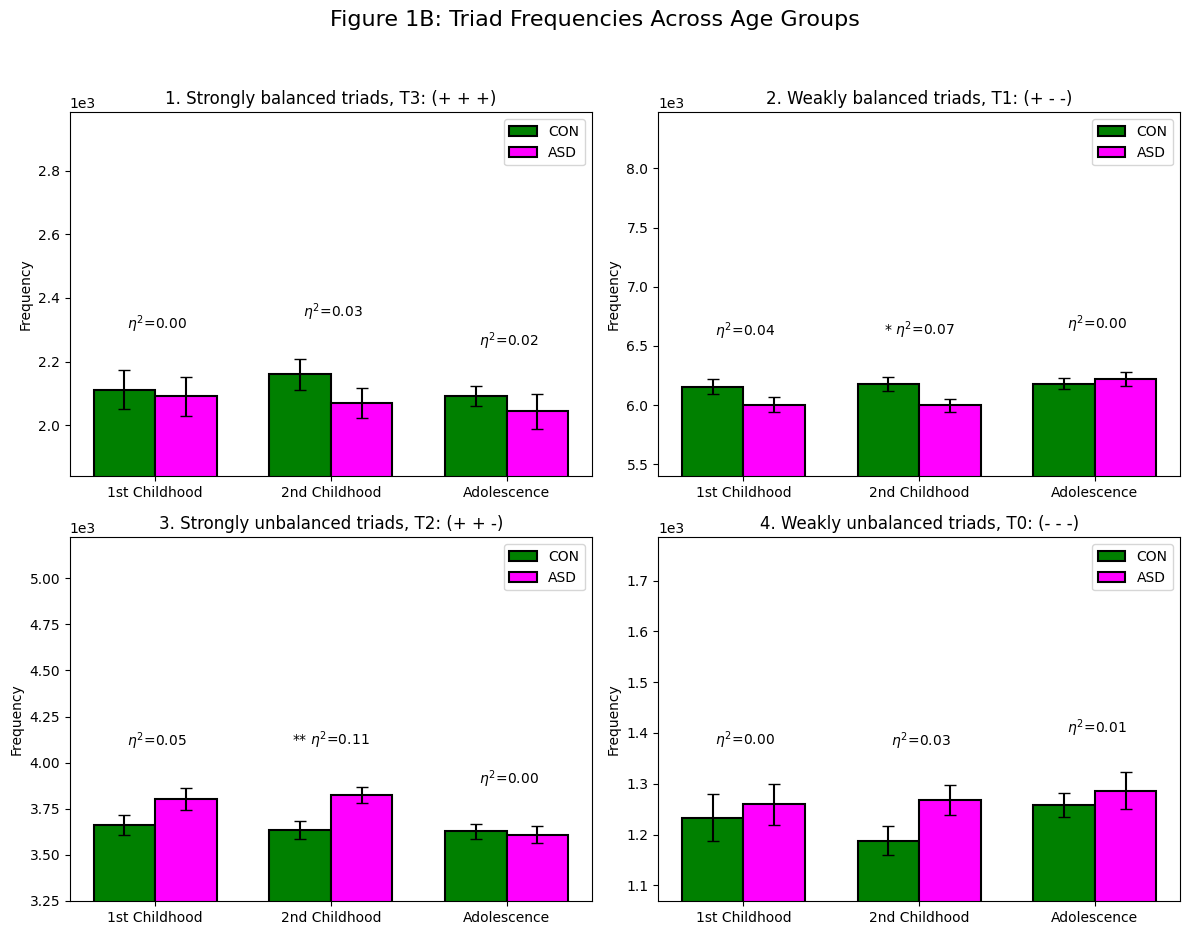

In [10]:
# --- [Cell 8: Generate Figure 1B (Triad Frequencies)] 

# Ensure the harmonized df_analysis and post-hoc stats are loaded from previous cells
if 'df_analysis' not in locals() or 'post_hoc_p_values' not in locals():
    raise NameError("DataFrames not found. Please run the data loading and statistics cells first.")

# --- Plotting Setup ---
# Define the specific metrics and titles for this figure
triad_metrics = ['T3', 'T1', 'T2', 'T0']
triad_titles = {
    'T3': '1. Strongly balanced triads, T3: (+ + +)', 'T1': '2. Weakly balanced triads, T1: (+ - -)',
    'T2': '3. Strongly unbalanced triads, T2: (+ + -)', 'T0': '4. Weakly unbalanced triads, T0: (- - -)'
}
age_order = ['1st Childhood', '2nd Childhood', 'Adolescence']

# Create a 2x2 subplot grid for the four triad types
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten() # Flatten the 2x2 array of axes for easy iteration

# Loop through each metric to create a subplot
for i, metric in enumerate(triad_metrics):
    # For each metric, group the data by Age and Group to calculate mean and standard error
    df_bar = df_analysis.groupby(["AgeGroup", "Group"], observed=True)[metric].agg(['mean', 'sem']).reset_index()

    # --- Manual Bar and Error Bar Plotting ---
    x = np.arange(len(age_order))  # the x-axis tick locations (0, 1, 2)
    width = 0.35  # the width of each individual bar
    
    # Prepare the data for each group (CON and ASD)
    con_means = df_bar[df_bar['Group'] == 'CON']['mean']
    asd_means = df_bar[df_bar['Group'] == 'ASD']['mean']
    con_sem = df_bar[df_bar['Group'] == 'CON']['sem']
    asd_sem = df_bar[df_bar['Group'] == 'ASD']['sem']
    
    # Plot the bars with manual offsets for side-by-side comparison
    axes[i].bar(x - width/2, con_means, width, label='CON', color='green', edgecolor='black', linewidth=1.5)
    axes[i].bar(x + width/2, asd_means, width, label='ASD', color='magenta', edgecolor='black', linewidth=1.5)

    # Add error bars, ensuring they are centered on the new bar positions
    axes[i].errorbar(x - width/2, con_means, yerr=con_sem, fmt='none', c='black', capsize=4)
    axes[i].errorbar(x + width/2, asd_means, yerr=asd_sem, fmt='none', c='black', capsize=4)

    # Add statistical annotations to each age group on the plot
    for j, age in enumerate(age_order):
        if metric in post_hoc_eta2 and age in post_hoc_eta2[metric]:
            eta2 = post_hoc_eta2[metric][age]
            p_val = post_hoc_p_values[metric][age]
            # Determine significance level for p-value
            sig = '**' if p_val < 0.01 else '*' if p_val < 0.05 else ''
            
            # Position the text above the taller of the two bars for that age group
            max_mean_plus_sem = (df_bar.loc[df_bar['AgeGroup'] == age, 'mean'] + df_bar.loc[df_bar['AgeGroup'] == age, 'sem']).max()
            axes[i].text(j, max_mean_plus_sem * 1.05, f'{sig} $\\eta^2$={eta2:.2f}', ha='center', va='bottom', fontsize=10)

    # Adjust y-axis limits to "zoom in" on the data and provide space for annotations
    if not df_bar.empty:
        min_val = df_bar['mean'].min()
        max_y_val = (df_bar['mean'] + df_bar['sem']).max()
        axes[i].set_ylim(min_val * 0.9, max_y_val * 1.35)

    # Set titles, labels, and ticks for the subplot
    axes[i].set_title(triad_titles[metric], fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Frequency")
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(age_order)
    axes[i].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    # Add a legend to each subplot for clarity
    axes[i].legend()

# --- Final Figure Formatting ---
plt.suptitle("Figure 1B: Triad Frequencies Across Age Groups", fontsize=16)
plt.tight_layout(rect=[0, 0.05, 1, 0.95]) # Adjust layout to prevent overlap

# Save the final figure to the output directory
plt.savefig(os.path.join(OUTPUT_DIR_KAGGLE, 'figure_1B_triads_final.png'), dpi=300, bbox_inches='tight')
plt.show()

## Cell 9: Generate Figure 2A (Energy Distributions)

In this cell, I create the plots for Figure 2A from the paper, which visualizes the energy distributions of $T_1$ and $T_0$ triads for subjects in the "1st Childhood" age group.

The process for each subplot is as follows:
1.  I load the lists of individual, continuous triad energies that I saved as separate `.npy` files during the main data processing step. This is done for both the ASD and CON groups.
2.  I create histograms of these energy values using logarithmically spaced bins to capture the wide range of data. This gives me the count of triads (`|Tᵢ|`) within each energy bin.
3.  I use `matplotlib`'s `loglog` plot type to visualize the results. This correctly scales both the x-axis (Energy) and y-axis (Counts) logarithmically, matching the style of the paper's figure.
4.  I also include a helper function to calculate the **Kullback-Leibler (KL) Divergence**, which is a statistical measure of how different the ASD and CON energy distributions are. This calculated value is then added as an annotation to the plot.

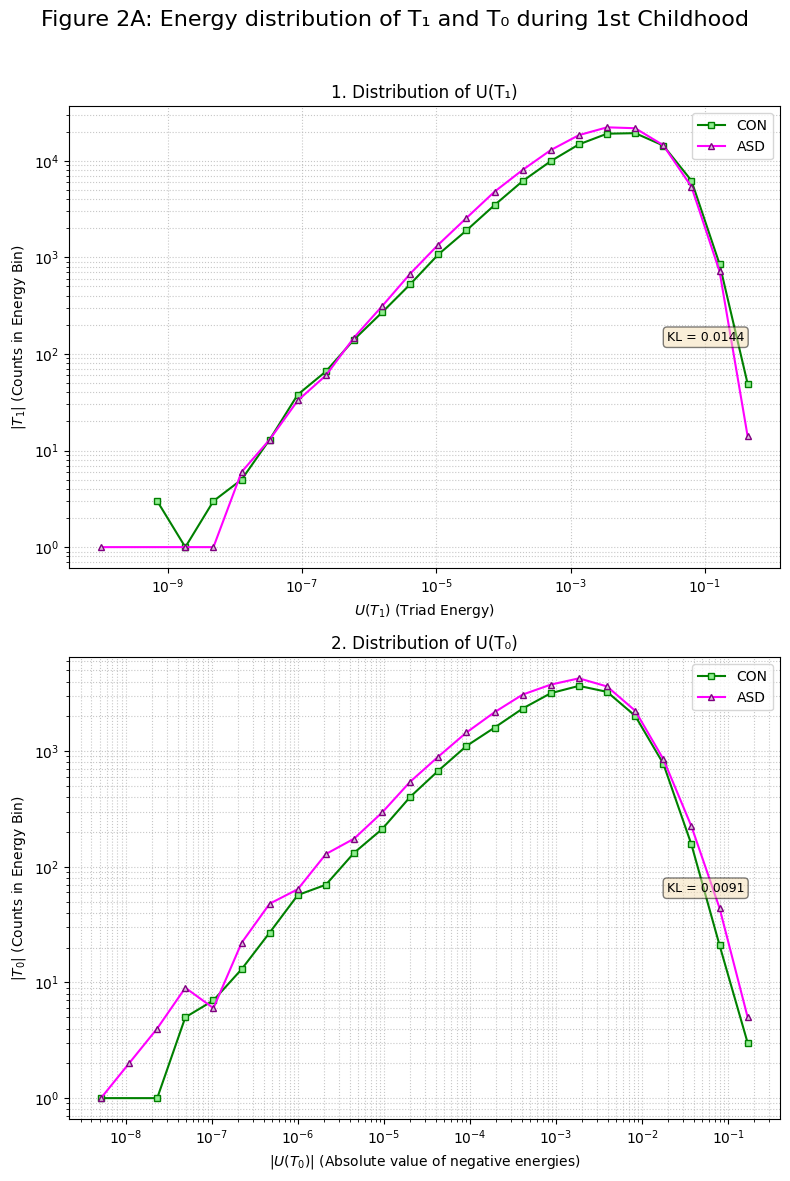

In [14]:
# --- [Cell 9: Generate Figure 2A (Energy Distributions)] ---

# Ensure the harmonized df_analysis is loaded to get the subject lists for filtering
if 'df_analysis' not in locals():
    raise NameError("df_analysis not found. Please load the final harmonized DataFrame first.")

# --- Helper function to calculate Symmetrized KL Divergence ---
def kl_divergence(p, q):
    """Calculates the symmetrized KL divergence between two probability distributions."""
    # Add a very small number (epsilon) to avoid division by zero or log(0) errors
    epsilon = 1e-10
    p = p + epsilon
    q = q + epsilon
    
    # Calculate KL divergence from P to Q and from Q to P
    kl_pq = np.sum(p * np.log(p / q))
    kl_qp = np.sum(q * np.log(q / p))
    
    # The symmetrized KL divergence is the sum of the two
    return kl_pq + kl_qp

# Filter the main DataFrame to get only the subjects in the "1st Childhood" age group
df_1st_childhood = df_analysis[df_analysis['AgeGroup'] == '1st Childhood'].copy()

if df_1st_childhood.empty:
    print("No data available for '1st Childhood' to plot Figure 2A.")
else:
    # --- Plotting Setup ---
    fig, axes = plt.subplots(2, 1, figsize=(8, 12))
    plt.subplots_adjust(hspace=0.4)

    # --- Plot 1: Log-log Distribution of U(T1) ---
    ax = axes[0]
    # Load all T1 energy lists from their separate .npy files for each group
    all_t1_con = [e for sid in df_1st_childhood[df_1st_childhood['Group']=='CON']['SUB_ID'] for e in np.load(os.path.join(ENERGY_LISTS_DIR, f"{sid}_T1_final.npy")) if e > 0]
    all_t1_asd = [e for sid in df_1st_childhood[df_1st_childhood['Group']=='ASD']['SUB_ID'] for e in np.load(os.path.join(ENERGY_LISTS_DIR, f"{sid}_T1_final.npy")) if e > 0]
    
    if all_t1_con or all_t1_asd:
        # Create logarithmically spaced bins for the histogram
        min_val = min(all_t1_con + all_t1_asd) if (all_t1_con + all_t1_asd) else 0.001
        max_val = max(all_t1_con + all_t1_asd) if (all_t1_con + all_t1_asd) else 1.0
        log_bins = np.logspace(np.log10(min_val), np.log10(max_val), 25)

        # Calculate histograms (counts of triads per energy bin) for each group
        counts_con, _ = np.histogram(all_t1_con, bins=log_bins)
        counts_asd, _ = np.histogram(all_t1_asd, bins=log_bins)
        # Find the center of each bin for plotting on the x-axis
        bin_centers = (log_bins[:-1] + log_bins[1:]) / 2

        # Convert counts to probabilities to calculate KL divergence
        prob_con = counts_con / np.sum(counts_con) if np.sum(counts_con) > 0 else np.zeros_like(counts_con)
        prob_asd = counts_asd / np.sum(counts_asd) if np.sum(counts_asd) > 0 else np.zeros_like(counts_asd)
        kl_t1 = kl_divergence(prob_con, prob_asd)

        # Use ax.loglog() to create a true log-log plot
        ax.loglog(bin_centers[counts_con > 0], counts_con[counts_con > 0],
                  marker='s', linestyle='-', color='green', label='CON', markersize=5, mfc='lightgreen', mec='green')
        ax.loglog(bin_centers[counts_asd > 0], counts_asd[counts_asd > 0],
                  marker='^', linestyle='-', color='magenta', label='ASD', markersize=5, mfc='thistle', mec='purple')
        
        ax.set_title('1. Distribution of U(T₁)')
        ax.set_xlabel('$U(T_{1})$ (Triad Energy)')
        ax.set_ylabel('$|T_{1}|$ (Counts in Energy Bin)')
        ax.text(0.95, 0.5, f'KL = {kl_t1:.4f}', ha='right', va='center', transform=ax.transAxes, fontsize=9, bbox=dict(boxstyle='round,pad=0.3', fc='wheat', alpha=0.5))

    # --- Plot 2: Log-log Distribution of U(T0) ---
    ax = axes[1]
    # Load T0 energy lists, taking the absolute value of the negative energies
    all_t0_con_abs = [abs(e) for sid in df_1st_childhood[df_1st_childhood['Group']=='CON']['SUB_ID'] for e in np.load(os.path.join(ENERGY_LISTS_DIR, f"{sid}_T0_final.npy")) if e < 0]
    all_t0_asd_abs = [abs(e) for sid in df_1st_childhood[df_1st_childhood['Group']=='ASD']['SUB_ID'] for e in np.load(os.path.join(ENERGY_LISTS_DIR, f"{sid}_T0_final.npy")) if e < 0]

    if all_t0_con_abs or all_t0_asd_abs:
        min_val = min(all_t0_con_abs + all_t0_asd_abs) if (all_t0_con_abs + all_t0_asd_abs) else 0.001
        max_val = max(all_t0_con_abs + all_t0_asd_abs) if (all_t0_con_abs + all_t0_asd_abs) else 1.0
        log_bins = np.logspace(np.log10(min_val), np.log10(max_val), 25)

        counts_con, _ = np.histogram(all_t0_con_abs, bins=log_bins)
        counts_asd, _ = np.histogram(all_t0_asd_abs, bins=log_bins)
        bin_centers = (log_bins[:-1] + log_bins[1:]) / 2
        
        # Convert to probabilities and calculate KL divergence for T0
        prob_con = counts_con / np.sum(counts_con) if np.sum(counts_con) > 0 else np.zeros_like(counts_con)
        prob_asd = counts_asd / np.sum(counts_asd) if np.sum(counts_asd) > 0 else np.zeros_like(counts_asd)
        kl_t0 = kl_divergence(prob_con, prob_asd)
        
        ax.loglog(bin_centers[counts_con > 0], counts_con[counts_con > 0],
                  marker='s', linestyle='-', color='green', label='CON', markersize=5, mfc='lightgreen', mec='green')
        ax.loglog(bin_centers[counts_asd > 0], counts_asd[counts_asd > 0],
                  marker='^', linestyle='-', color='magenta', label='ASD', markersize=5, mfc='thistle', mec='purple')

        ax.set_title('2. Distribution of U(T₀)')
        ax.set_xlabel('$|U(T_{0})|$ (Absolute value of negative energies)')
        ax.set_ylabel('$|T_{0}|$ (Counts in Energy Bin)')
        ax.text(0.95, 0.5, f'KL = {kl_t0:.4f}', ha='right', va='center', transform=ax.transAxes, fontsize=9, bbox=dict(boxstyle='round,pad=0.3', fc='wheat', alpha=0.5))

    # Add shared formatting to both subplots
    for ax in axes:
        ax.legend()
        ax.grid(True, which="both", linestyle=':', alpha=0.7)

    # --- Final Figure Formatting ---
    fig.suptitle('Figure 2A: Energy distribution of T₁ and T₀ during 1st Childhood', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.savefig(os.path.join(OUTPUT_DIR_KAGGLE, 'figure_2A_final_logscale.png'), dpi=300)
    plt.show()



## Cell 10: Generate Figure 3 (Network Energy Box Plots)

In this cell, I create the plots for Figure 3 from the paper, which visualizes the network energy levels for the whole brain and for two key sub-networks: the Salience Network (SN) and the Default Mode Network (DMN).

The purpose of this figure is to compare the overall structural balance energy (`U(N)`) between the ASD and CON groups across the three developmental age ranges. The process for creating the figure is as follows:

1.  I load my final harmonized `df_analysis` DataFrame.
2.  I create a 1x3 grid of subplots for plots A, B, and C.
3.  For each subplot, I use `seaborn`'s `boxplot` function to visualize the distribution of energy values for each group and age. The box shows the median and interquartile range, while the whiskers and outlier points show the spread of the data.
4.  I add titles and labels to make the plots clear and comparable to the paper's figure.

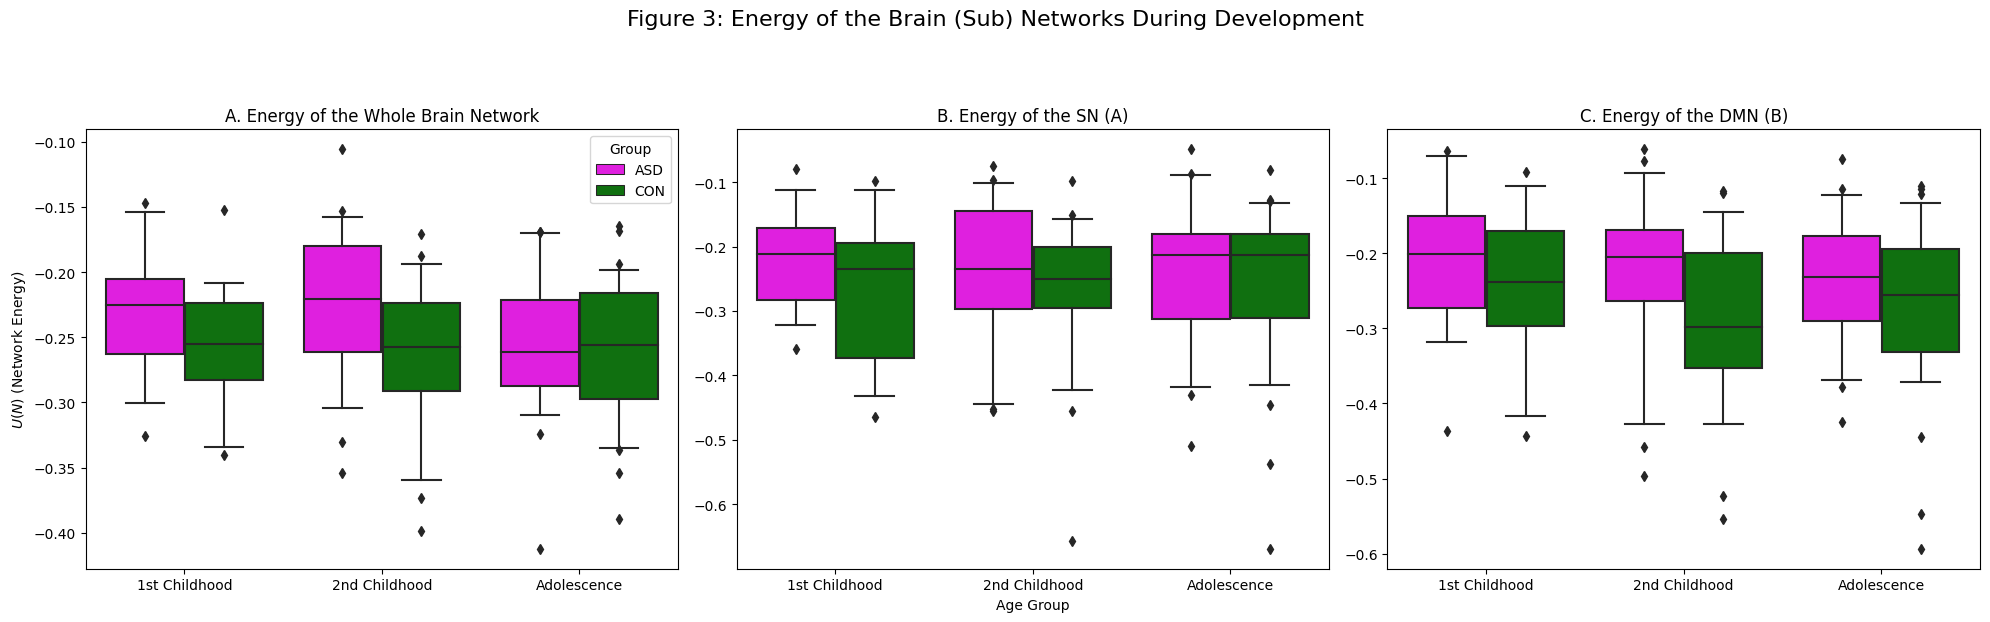

In [15]:
# --- [Cell 10: Generate Figure 3 (Network Energy Box Plots)] ---

# Ensure the harmonized df_analysis is loaded from a previous cell
if 'df_analysis' not in locals():
    # Attempt to load it if it's not in memory
    try:
        df_analysis = pd.read_pickle(os.path.join(OUTPUT_DIR_KAGGLE, 'df_analysis_final_harmonized.pkl'))
        print("Successfully loaded the final harmonized DataFrame.")
        # Re-apply categorical order if loaded from pickle, which is important for plotting
        age_order = ['1st Childhood', '2nd Childhood', 'Adolescence']
        df_analysis['AgeGroup'] = pd.Categorical(df_analysis['AgeGroup'], categories=age_order, ordered=True)
    except FileNotFoundError:
        raise NameError("df_analysis not found. Please run the main data processing cell first.")

# Check if all necessary columns for this figure exist in the DataFrame
required_cols = ['Energy_Whole_Brain', 'Energy_SN_A', 'Energy_DMN_B', 'AgeGroup', 'Group']
if not all(col in df_analysis.columns for col in required_cols):
    raise KeyError("DataFrame is missing required energy columns for Figure 3.")

# --- Plotting Setup ---
# Create a figure with a 1x3 grid of subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
# Define the order for the x-axis categories
age_order = ['1st Childhood', '2nd Childhood', 'Adolescence']
# Define the color palette to match the paper (CON=green, ASD=magenta)
palette = {"CON": "green", "ASD": "magenta"}

# --- Plot A: Energy of the Whole Brain Network ---
ax = axes[0]
sns.boxplot(x='AgeGroup', y='Energy_Whole_Brain', hue='Group', data=df_analysis, ax=ax,
            palette=palette, order=age_order, 
            whis=[5, 95]) # Set whiskers to 5th and 95th percentiles to show outliers, similar to the paper
ax.set_title('A. Energy of the Whole Brain Network', fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('$U(N)$ (Network Energy)')
ax.legend(title='Group')


# --- Plot B: Energy of the SN (A) ---
ax = axes[1]
sns.boxplot(x='AgeGroup', y='Energy_SN_A', hue='Group', data=df_analysis, ax=ax,
            palette=palette, order=age_order, whis=[5, 95])
ax.set_title('B. Energy of the SN (A)', fontsize=12)
ax.set_xlabel('Age Group')
ax.set_ylabel('') # Remove redundant y-axis label
# Remove the legend from the middle plot to avoid clutter
if ax.get_legend() is not None: ax.get_legend().remove()


# --- Plot C: Energy of the DMN (B) ---
ax = axes[2]
sns.boxplot(x='AgeGroup', y='Energy_DMN_B', hue='Group', data=df_analysis, ax=ax,
            palette=palette, order=age_order, whis=[5, 95])
ax.set_title('C. Energy of the DMN (B)', fontsize=12)
ax.set_xlabel('')
ax.set_ylabel('') # Remove redundant y-axis label
if ax.get_legend() is not None: ax.get_legend().remove()

# --- Final Figure Formatting ---
plt.suptitle('Figure 3: Energy of the Brain (Sub) Networks During Development', fontsize=16, y=1.03)
plt.tight_layout(rect=[0, 0, 1, 0.95]) # Adjust layout to prevent title overlap
# Save the final figure to the output directory
plt.savefig(os.path.join(OUTPUT_DIR_KAGGLE, 'figure_3_final.png'), dpi=300, bbox_inches='tight')
plt.show()



## Cell 11: Generate Figure 4 (Correlations with Behavioral Scores)

In this cell, I create the scatter plots for Figure 4 from the paper. This figure explores the relationship between the network energy metrics I calculated and various clinical behavioral scores (from ADOS and ADI).

The process for creating this figure is as follows:
1.  I first load my final, clean `df_analysis_final_harmonized.pkl` DataFrame.
2.  I then load the original `Phenotypic_V1_0b_preprocessed1.csv` file and merge the necessary behavioral score columns into my main DataFrame. This step also includes cleaning the data by replacing the `-9999` missing value placeholders with `NaN`.
3.  I create a 2x3 grid of subplots, one for each correlation shown in the paper.
4.  For each subplot, I filter the data for the correct age group and drop any subjects with missing values for that specific comparison.
5.  I then plot the data as a scatter plot with an overlaid regression line.
6.  Finally, I calculate the **Pearson correlation coefficient (`r`)** and the **p-value** directly from my data and add these statistics as an annotation onto each subplot.

Successfully loaded and merged behavioral scores into the DataFrame.
Replaced -9999 placeholders with NaN for accurate analysis.


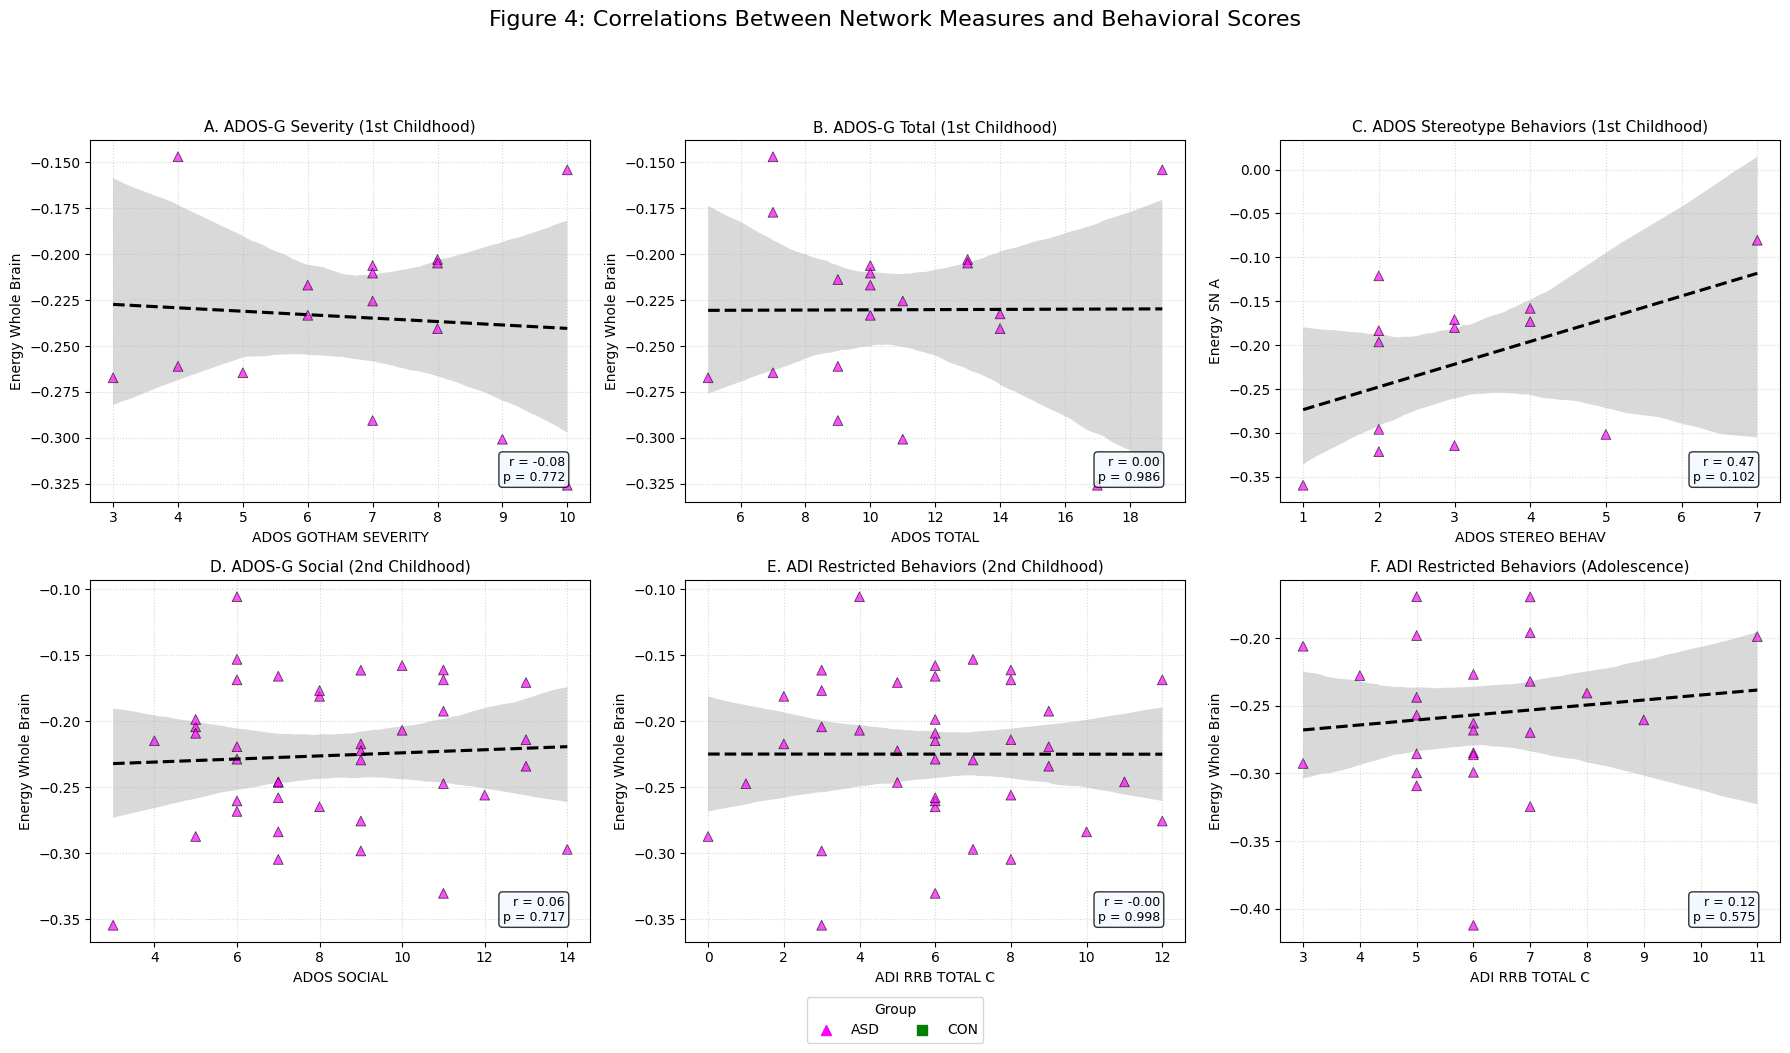

In [16]:
# --- [Cell 11: Generate Figure 4 (Correlations with Behavioral Scores)] ---

# Import necessary libraries for file operations, data handling, and plotting
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import warnings

warnings.filterwarnings("ignore")

# --- 1. Define File Paths ---
OUTPUT_DIR_KAGGLE = '/kaggle/working/'
KAGGLE_INPUT_DIR = '/kaggle/input/abide-preprocessed-data' 
PHENO_FILE = os.path.join(KAGGLE_INPUT_DIR, 'Phenotypic_V1_0b_preprocessed1.csv')

# --- 2. Load Harmonized Data and Merge with Behavioral Scores ---
try:
    # Load the main DataFrame containing the calculated energy metrics
    df_analysis = pd.read_pickle(os.path.join(OUTPUT_DIR_KAGGLE, 'df_analysis_final_harmonized.pkl'))
    
    # Load the original phenotype file to get the behavioral scores
    df_pheno = pd.read_csv(PHENO_FILE)
    # Standardize the subject ID format to ensure a successful merge
    df_pheno['SUB_ID'] = df_pheno['SUB_ID'].apply(lambda x: f'{x:07d}')
    
    # Define the exact behavioral score columns needed for the plots
    behavioral_cols_to_add = [
        'SUB_ID', 'ADOS_GOTHAM_SEVERITY', 'ADOS_TOTAL', 
        'ADOS_STEREO_BEHAV', 'ADOS_SOCIAL', 'ADI_RRB_TOTAL_C'
    ]
    
    # Merge the scores into the main analysis dataframe based on the common 'SUB_ID'
    df_analysis = pd.merge(df_analysis, df_pheno[behavioral_cols_to_add], on='SUB_ID', how='left')
    
    print("Successfully loaded and merged behavioral scores into the DataFrame.")

    # KEY DATA CLEANING STEP: Replace -9999 placeholders with NaN (Not a Number)
    for col in behavioral_cols_to_add[1:]: # Loop through score columns
        if col in df_analysis.columns:
            # Check if the column is numeric before replacing
            if pd.api.types.is_numeric_dtype(df_analysis[col]):
                df_analysis[col].replace(-9999, np.nan, inplace=True)
    print("Replaced -9999 placeholders with NaN for accurate analysis.")
    
except Exception as e:
    print(f"An error occurred during data loading or cleaning: {e}")


# --- 3. Define parameters for each of the 6 subplots ---
# This list of dictionaries makes it easy to loop through and create each plot
plot_params = [
    {'x': 'ADOS_GOTHAM_SEVERITY', 'y': 'Energy_Whole_Brain', 'title': 'A. ADOS-G Severity', 'age': '1st Childhood'},
    {'x': 'ADOS_TOTAL', 'y': 'Energy_Whole_Brain', 'title': 'B. ADOS-G Total', 'age': '1st Childhood'},
    {'x': 'ADOS_STEREO_BEHAV', 'y': 'Energy_SN_A', 'title': 'C. ADOS Stereotype Behaviors', 'age': '1st Childhood'},
    {'x': 'ADOS_SOCIAL', 'y': 'Energy_Whole_Brain', 'title': 'D. ADOS-G Social', 'age': '2nd Childhood'},
    {'x': 'ADI_RRB_TOTAL_C', 'y': 'Energy_Whole_Brain', 'title': 'E. ADI Restricted Behaviors', 'age': '2nd Childhood'},
    {'x': 'ADI_RRB_TOTAL_C', 'y': 'Energy_Whole_Brain', 'title': 'F. ADI Restricted Behaviors', 'age': 'Adolescence'}
]

# --- 4. Plotting Setup ---
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
plt.subplots_adjust(hspace=0.45, wspace=0.3) # Adjust spacing between plots
axes = axes.flatten() # Flatten the 2x3 grid into a 1D array for easy looping

# --- 5. Main Plotting Loop ---
for i, params in enumerate(plot_params):
    ax = axes[i]
    
    # Filter data for the specific age group for the current subplot
    df_subset = df_analysis[df_analysis['AgeGroup'] == params['age']].copy()
    # Drop any subjects that have missing values for the specific x or y variables being plotted
    df_subset.dropna(subset=[params['x'], params['y']], inplace=True)
    
    if not df_subset.empty:
        # Use seaborn's regplot to draw the regression line and confidence interval
        sns.regplot(x=params['x'], y=params['y'], data=df_subset, ax=ax,
                    scatter_kws={'s': 0}, line_kws={'color': 'black', 'linestyle': '--'})
        
        # Overlay a scatterplot to color the individual points by group
        sns.scatterplot(x=params['x'], y=params['y'], hue='Group', style='Group', 
                        data=df_subset, ax=ax,
                        palette={'ASD': 'magenta', 'CON': 'green'}, markers={'ASD': '^', 'CON': 's'},
                        s=50, alpha=0.7, edgecolor='k', legend=False)

        # Calculate the Pearson correlation coefficient (r) and p-value from the data
        r_val, p_val = pearsonr(df_subset[params['x']], df_subset[params['y']])
        
        # Add the calculated statistics as text onto the plot
        ax.text(0.95, 0.05, f'r = {r_val:.2f}\np = {p_val:.3f}',
                ha='right', va='bottom', transform=ax.transAxes, fontsize=9,
                bbox=dict(boxstyle='round,pad=0.3', fc='aliceblue', alpha=0.8))
    else:
        # If no data remains after filtering, display a message
        ax.text(0.5, 0.5, "No valid data points", ha='center', va='center', transform=ax.transAxes)

    # Set titles and labels for the subplot
    ax.set_title(f"{params['title']} ({params['age']})", fontsize=11)
    ax.set_xlabel(params['x'].replace('_', ' '))
    ax.set_ylabel(params['y'].replace('_', ' '))
    ax.grid(True, linestyle=':', alpha=0.5)

# --- 6. Final Figure Formatting ---
fig.suptitle('Figure 4: Correlations Between Network Measures and Behavioral Scores', fontsize=16, y=1.02)

# Manually create a single legend for the entire figure at the bottom
handles, labels = [], []
if any(ax.has_data() for ax in axes):
    import matplotlib.lines as mlines
    handles = [
        mlines.Line2D([], [], color='magenta', marker='^', linestyle='None', markersize=7, label='ASD'),
        mlines.Line2D([], [], color='green', marker='s', linestyle='None', markersize=7, label='CON')
    ]
    labels = ['ASD', 'CON']
    fig.legend(handles, labels, loc='lower center', ncol=2, title="Group", bbox_to_anchor=(0.5, -0.02))

plt.tight_layout(rect=[0, 0.03, 1, 0.96])

# Save the final figure to the output directory
plt.savefig(os.path.join(OUTPUT_DIR_KAGGLE, 'figure_4_final.png'), dpi=300, bbox_inches='tight')
plt.show()



In [44]:
# --- [Diagnostic Cell to Find Correct Column Names] ---
import pandas as pd
import os

# Define the path to the phenotype file
KAGGLE_INPUT_DIR = '/kaggle/input/abide-preprocessed-data'
PHENO_FILE = os.path.join(KAGGLE_INPUT_DIR, 'Phenotypic_V1_0b_preprocessed1.csv')

# Load the file and print all column names
try:
    df_pheno_check = pd.read_csv(PHENO_FILE)
    print("Available columns in the phenotype file:")
    print(list(df_pheno_check.columns))
except FileNotFoundError:
    print("Phenotype file not found. Please check the KAGGLE_INPUT_DIR path.")

Available columns in your phenotype file:
['Unnamed: 0.1', 'Unnamed: 0', 'SUB_ID', 'X', 'subject', 'SITE_ID', 'FILE_ID', 'DX_GROUP', 'DSM_IV_TR', 'AGE_AT_SCAN', 'SEX', 'HANDEDNESS_CATEGORY', 'HANDEDNESS_SCORES', 'FIQ', 'VIQ', 'PIQ', 'FIQ_TEST_TYPE', 'VIQ_TEST_TYPE', 'PIQ_TEST_TYPE', 'ADI_R_SOCIAL_TOTAL_A', 'ADI_R_VERBAL_TOTAL_BV', 'ADI_RRB_TOTAL_C', 'ADI_R_ONSET_TOTAL_D', 'ADI_R_RSRCH_RELIABLE', 'ADOS_MODULE', 'ADOS_TOTAL', 'ADOS_COMM', 'ADOS_SOCIAL', 'ADOS_STEREO_BEHAV', 'ADOS_RSRCH_RELIABLE', 'ADOS_GOTHAM_SOCAFFECT', 'ADOS_GOTHAM_RRB', 'ADOS_GOTHAM_TOTAL', 'ADOS_GOTHAM_SEVERITY', 'SRS_VERSION', 'SRS_RAW_TOTAL', 'SRS_AWARENESS', 'SRS_COGNITION', 'SRS_COMMUNICATION', 'SRS_MOTIVATION', 'SRS_MANNERISMS', 'SCQ_TOTAL', 'AQ_TOTAL', 'COMORBIDITY', 'CURRENT_MED_STATUS', 'MEDICATION_NAME', 'OFF_STIMULANTS_AT_SCAN', 'VINELAND_RECEPTIVE_V_SCALED', 'VINELAND_EXPRESSIVE_V_SCALED', 'VINELAND_WRITTEN_V_SCALED', 'VINELAND_COMMUNICATION_STANDARD', 'VINELAND_PERSONAL_V_SCALED', 'VINELAND_DOMESTIC_V_SCA